In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


data = pd.read_csv('/content/drive/MyDrive/rosresampled_dataset.csv')
data.head(5)

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,target
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,L
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,M
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,M
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,M
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,L


In [2]:
data.isnull().sum()

Product_Id                    0
Product_Weight                0
Product_Sugar_Content         0
Product_Allocated_Area      349
Product_Type                  0
Product_MRP                   0
Store_Id                      0
Store_Establishment_Year      0
Store_Size                    0
Store_Location_City_Type      0
Store_Type                    0
target                        0
dtype: int64

In [3]:
data['Product_Allocated_Area']=data['Product_Allocated_Area'].ffill()

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Product_Id'] = le.fit_transform(data['Product_Id'])
data['Product_Sugar_Content'] = le.fit_transform(data['Product_Sugar_Content'])
data['Product_Type'] = le.fit_transform(data['Product_Type'])
data['Store_Id'] = le.fit_transform(data['Store_Id'])
data['Store_Size'] = le.fit_transform(data['Store_Size'])
data['Store_Location_City_Type'] = le.fit_transform(data['Store_Location_City_Type'])
data['Store_Type'] = le.fit_transform(data['Store_Type'])
data['target'] = le.fit_transform(data['target'])


In [24]:
X = data.iloc[:,0:11] # Features
y = data['target']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (recommended for Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.9236177692553531
Confusion Matrix:
[[1024    7   40]
 [   0 1000   18]
 [ 137   37  866]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1071
           1       0.96      0.98      0.97      1018
           2       0.94      0.83      0.88      1040

    accuracy                           0.92      3129
   macro avg       0.93      0.92      0.92      3129
weighted avg       0.93      0.92      0.92      3129



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


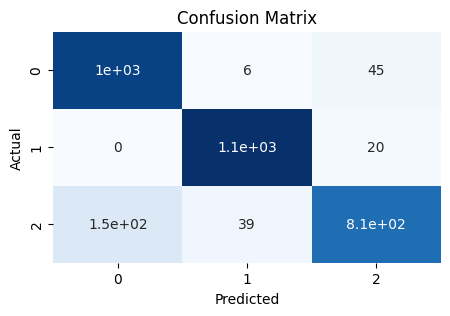

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,3))
sns.heatmap(conf_matrix,annot=True,cmap='Blues',cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [7]:
report=classification_report(y_test,y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      1046
           1       0.96      0.98      0.97      1084
           2       0.93      0.81      0.86       999

    accuracy                           0.92      3129
   macro avg       0.92      0.91      0.91      3129
weighted avg       0.92      0.92      0.91      3129

